In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import datetime
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')

In [2]:
# Loading the Loan Dataset

loan_data = pd.read_csv("loan.csv")

In [3]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
loan_data.shape

(39717, 111)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# Columns with null values less than 40%

columns = loan_data.columns[round(loan_data.isnull().mean()*100,2) < 40]
print(columns.size)

54


In [7]:
# columns with null values greater than 40%, which makes the data unreliable as the values are imputed

null_columns = loan_data.columns[round(loan_data.isnull().mean()*100,2) >=40]
print(null_columns.size)
# print(loan_data.columns[round(loan_data.isnull().mean()*100,2) >= 40].size)

57


In [8]:
loan_data.drop(columns=null_columns, inplace=True)

In [9]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.0            1       INDIVIDUAL   
1             Sep-13                        0.0            1       INDIVIDUAL   
2             May-16                        0.0            1       INDIVIDUAL   
3             Apr-16                        0.0            1       INDIVIDUAL   
4             May-16                        0.0            1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0              0                      0.0           0                  0.0   
1              0                      0.0           0                  0.0   
2              0                      0.0           0                  0.0   
3              0                      0.0           0                  0.0   
4              0                      0.0           0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 54 columns]

In [10]:
round((loan_data.isnull().mean()*100), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
emp_details = ["id", "member_id", "emp_title", "desc"]

In [12]:
loan_data.drop(columns=emp_details, inplace=True)

In [13]:
loan_data.shape

(39717, 50)

In [14]:
round((loan_data.isnull().mean()*100), 2)

loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util                    0.13
total_acc           

In [15]:
loan_data.dropna(inplace=True)

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37823 entries, 0 to 39623
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   37823 non-null  int64  
 1   funded_amnt                 37823 non-null  int64  
 2   funded_amnt_inv             37823 non-null  float64
 3   term                        37823 non-null  object 
 4   int_rate                    37823 non-null  object 
 5   installment                 37823 non-null  float64
 6   grade                       37823 non-null  object 
 7   sub_grade                   37823 non-null  object 
 8   emp_length                  37823 non-null  object 
 9   home_ownership              37823 non-null  object 
 10  annual_inc                  37823 non-null  float64
 11  verification_status         37823 non-null  object 
 12  issue_d                     37823 non-null  object 
 13  loan_status                 37823 no

In [17]:
datetime_fn = lambda x: datetime.strptime(x, "%b-%y")

In [18]:
loan_data["issue_full_date"] = list(map(datetime_fn, loan_data["issue_d"].values))
loan_data["earliest_cr_full_date"] = list(map(datetime_fn, loan_data["earliest_cr_line"].values))

In [19]:
delta = loan_data["issue_full_date"] - loan_data["earliest_cr_full_date"]

In [20]:
loan_data["credit_history"] = [days.days for days in delta]

In [21]:
px.pie(data_frame=loan_data, names=loan_data["loan_status"].unique(), values=loan_data["loan_status"].value_counts().to_dict().values())

In [22]:
loan_data.groupby(by=["loan_status"])["loan_status"].count()

loan_status
Charged Off     5201
Current         1098
Fully Paid     31524
Name: loan_status, dtype: int64

# Univariate Analysis

In [23]:
loan_data["int_rate"] = loan_data.int_rate.apply(lambda x: float(x.split("%")[0]))
loan_data["revol_util"] = loan_data.revol_util.apply(lambda x: float(x.split("%")[0]))

In [24]:
loan_data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [25]:
loan_data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

Removing Outliers

In [26]:
percentile_2_5 = np.percentile(loan_data["annual_inc"], 2.5)
percentile_97_5 = np.percentile(loan_data["annual_inc"], 97.5)

loan_data = loan_data[(loan_data["annual_inc"]>=percentile_2_5) & (loan_data["annual_inc"] <= percentile_97_5)]

Text(0.5, 0, 'Annual Income')

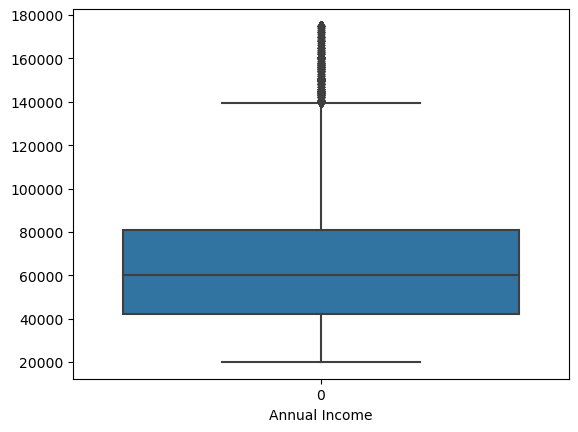

In [27]:
sns.boxplot(loan_data["annual_inc"])
plt.xlabel("Annual Income")

In [28]:
percentile_2_5 = np.percentile(loan_data["loan_amnt"], 2.5)
percentile_97_5 = np.percentile(loan_data["loan_amnt"], 97.5)

loan_data = loan_data[(loan_data["loan_amnt"]>=percentile_2_5) & (loan_data["loan_amnt"] <= percentile_97_5)]

Text(0.5, 0, 'Loan Amount')

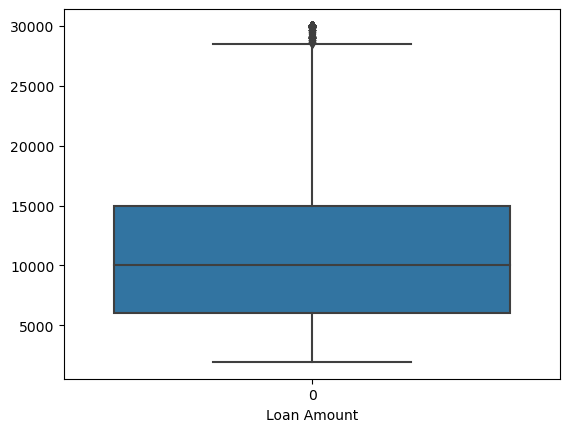

In [29]:
sns.boxplot(loan_data["loan_amnt"])
plt.xlabel("Loan Amount")

Text(0.5, 0, 'Interest Rate')

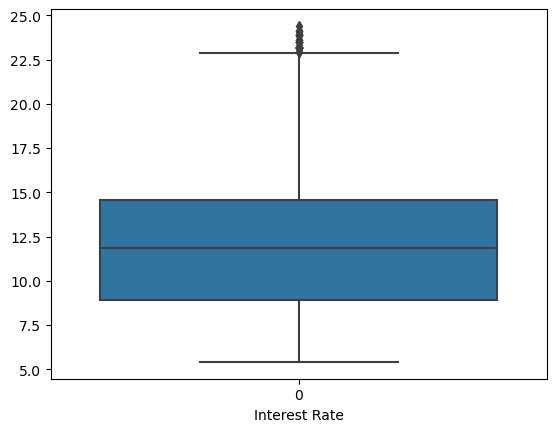

In [30]:
# int_rate looks good

sns.boxplot(loan_data["int_rate"])
plt.xlabel("Interest Rate")

Text(0.5, 0, 'Revolving Balance Utilisation')

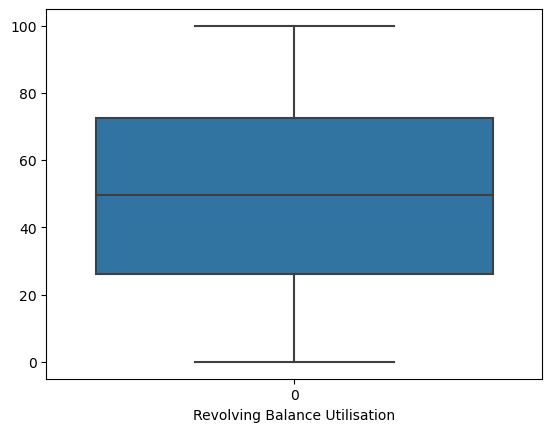

In [31]:
# Revolving Balance Utilisation

sns.boxplot(loan_data["revol_util"])
plt.xlabel("Revolving Balance Utilisation")

Text(0.5, 0, 'DTI')

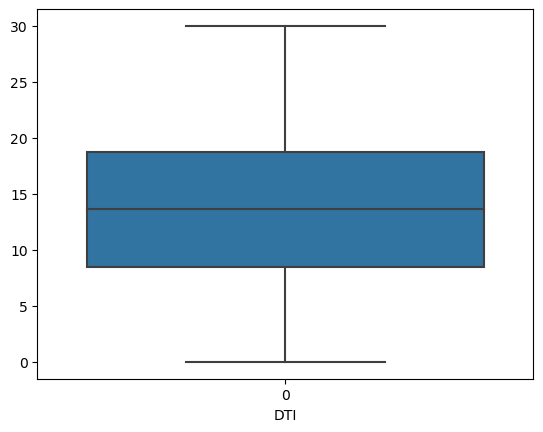

In [32]:
# DTI

sns.boxplot(loan_data["dti"])
plt.xlabel("DTI")

<Axes: xlabel='grade', ylabel='count'>

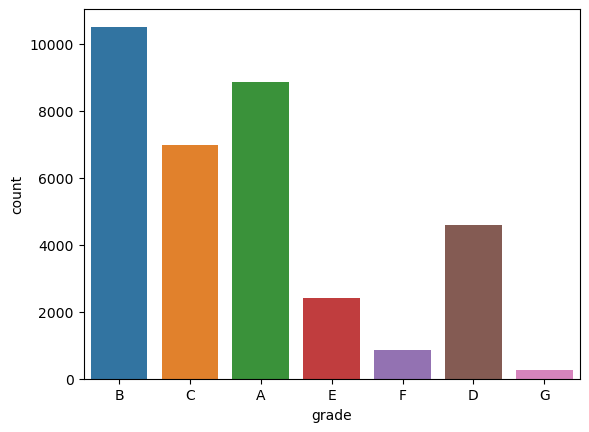

In [33]:
# Employess with Grade B has taken more loans compared to all other Grades

sns.countplot(x=loan_data["grade"])

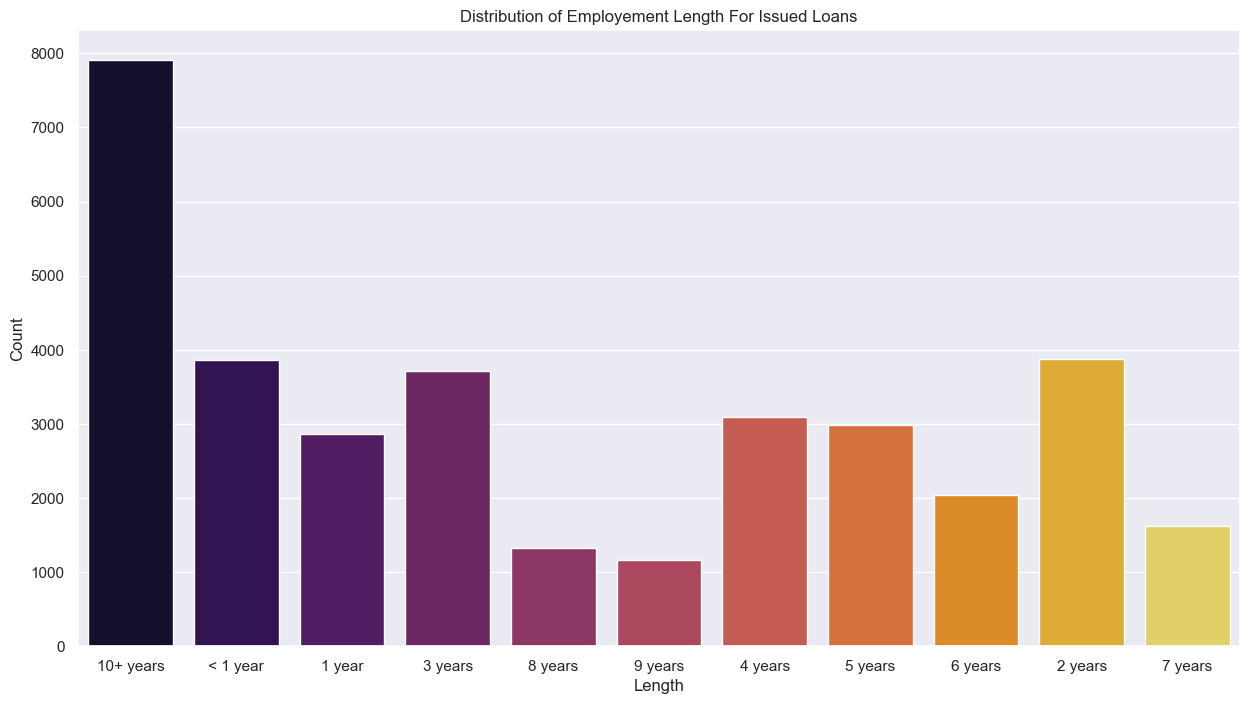

In [34]:
# Employees with 10+ years of experience tends to take more loan in comparision with others

sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=loan_data['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

<Axes: xlabel='dti_bin', ylabel='count'>

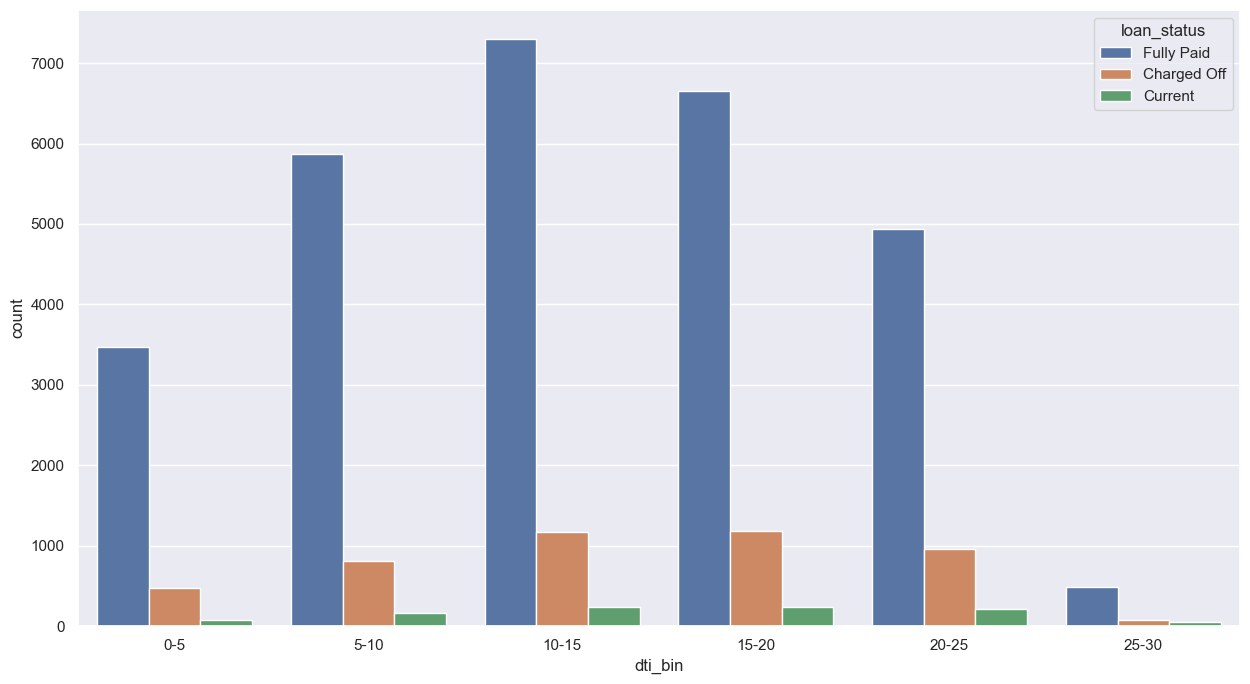

In [35]:
loan_data['dti_bin'] = pd.cut(loan_data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

sns.countplot(x=loan_data["dti_bin"], hue=loan_data["loan_status"])

Most of the defaulters are with the DTI between 10% and 20%

<Axes: xlabel='dti_bin', ylabel='open_acc'>

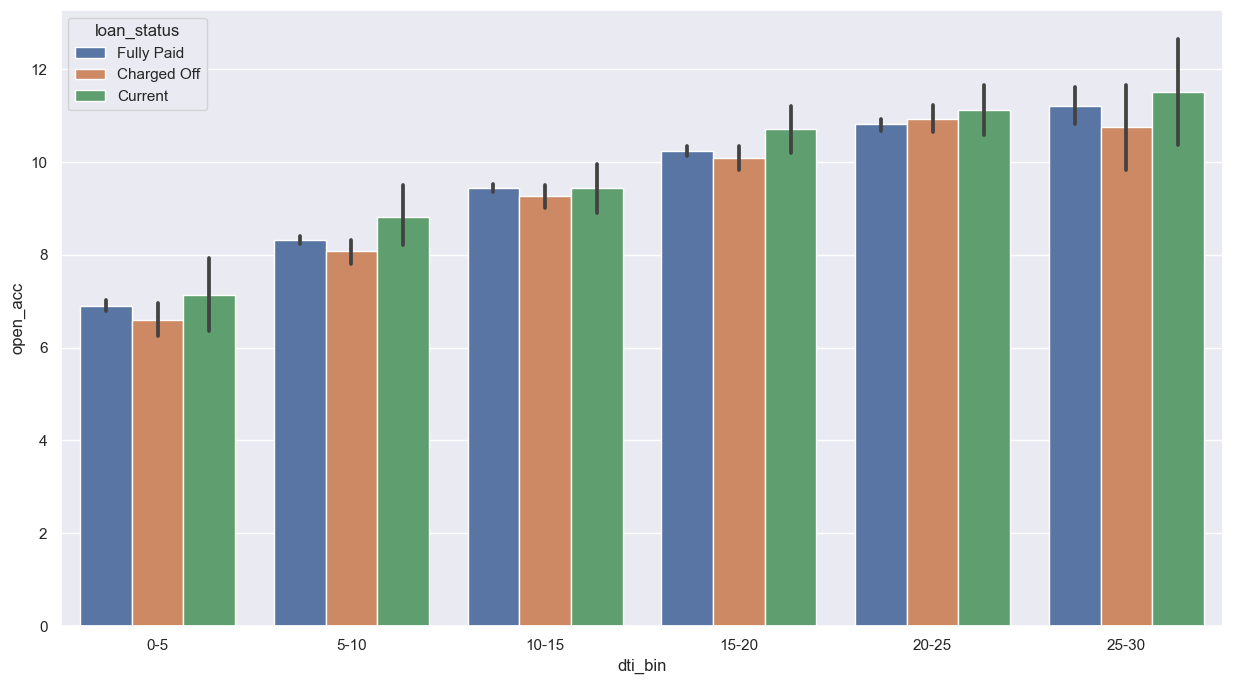

In [36]:
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan_data, estimator=np.mean)

Number pf charged off increases with dti range

# Bi-variate Analysis

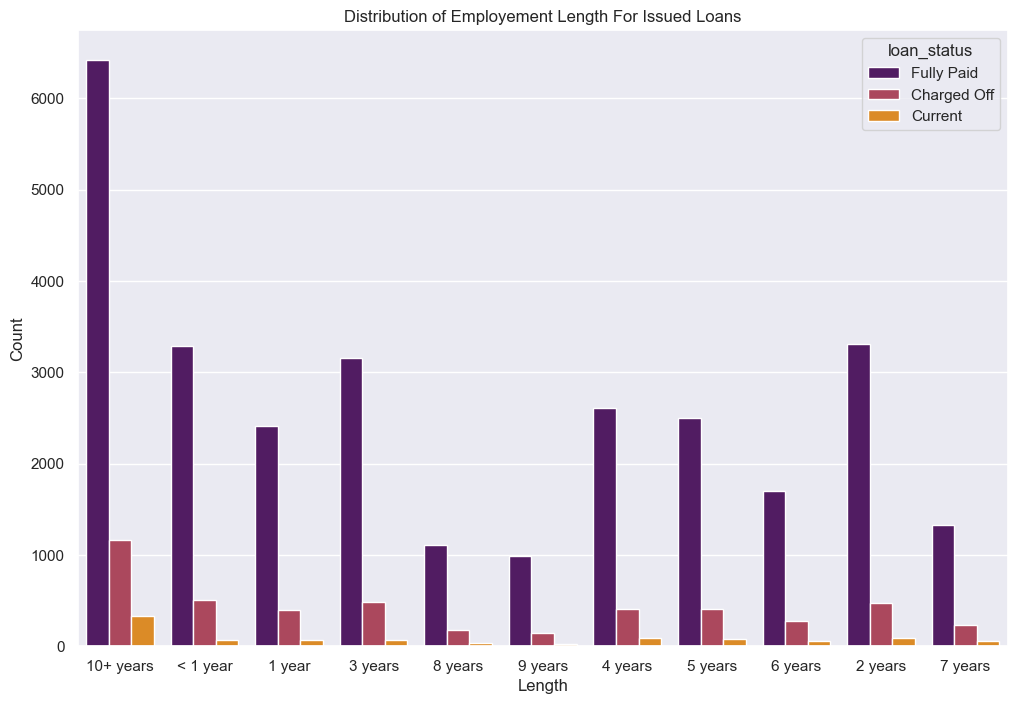

In [37]:
# Employes having 10 years of experience and < 1 year experience tend to take the major proportion of 
# defaulter list 

sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=loan_data['emp_length'],palette='inferno', hue=loan_data["loan_status"])
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

Employes having 10 years of experience and < 1 year experience tend to take the major proportion of defaulter list 

<Axes: xlabel='emp_length', ylabel='annual_inc'>

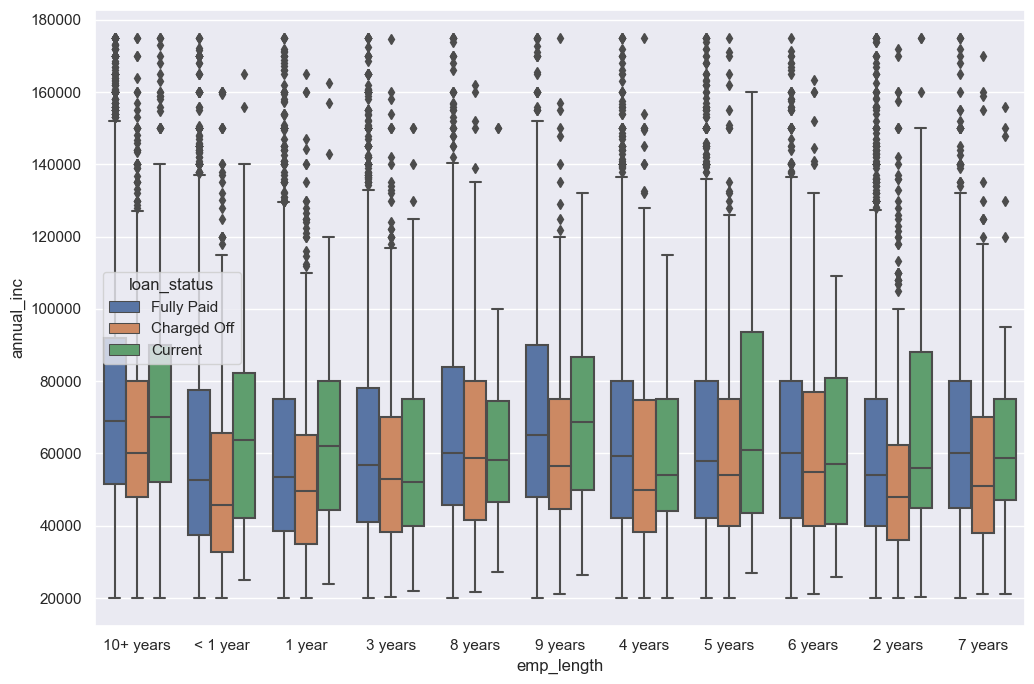

In [38]:

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=loan_data["emp_length"], y=loan_data["annual_inc"], hue=loan_data["loan_status"])

Employees having median salary less than the normal tend to be charged off

In [39]:
emp_len_pivot_table = pd.pivot_table(loan_data, index=["emp_length", "term", "loan_status"], 
               aggfunc={'annual_inc':np.median, "loan_amnt": np.median, 'loan_status':np.count_nonzero})

# ["annual_inc", "loan_amnt"]

In [40]:
emp_len_pivot_table["Percent"] = round((emp_len_pivot_table["loan_status"]/ loan_data.shape[0]*100), 2)

In [41]:
emp_len_pivot_table

annual_inc  loan_amnt  loan_status  Percent
emp_length term       loan_status                                             
1 year      36 months Charged Off     47500.0       8000          250     0.73
                      Fully Paid      53000.0       8000         2011     5.84
            60 months Charged Off     51000.0      14000          144     0.42
                      Current         62102.0      12925           66     0.19
                      Fully Paid      54000.0      12875          397     1.15
10+ years   36 months Charged Off     58044.0       9600          547     1.59
                      Fully Paid      68000.0       9775         4696    13.63
            60 months Charged Off     62695.0      16000          613     1.78
                      Current         70000.0      16100          333     0.97
                      Fully Paid      70000.0      15000         1728     5.02
2 years     36 months Charged Off     45996.0       7500          293     0.85
                      Fully Paid      54000.0       8000         2704     7.85
            60 months Charged Off     48000.0      12250          183     0.53
                      Current         56000.0      14700           89     0.26
                      Fully Paid      55000.0      12000          602     1.75
3 years     36 months Charged Off     52000.0       8000          284     0.82
                      Fully Paid      56000.0       8400         2512     7.29
            60 months Charged Off     54000.0      12000          198     0.57
                      Current         52000.0      13475           69     0.20
                      Fully Paid      59400.0      12350          646     1.88
4 years     36 months Charged Off     50000.0       8000          241     0.70
                      Fully Paid      57632.0       8875         2064     5.99
            60 months Charged Off     54998.0      12850          162     0.47
                      Current         54000.0      14000           85     0.25
                      Fully Paid      60758.0      14000          539     1.56
5 years     36 months Charged Off     52000.0       8400          223     0.65
                      Fully Paid      57000.0       8500         1915     5.56
            60 months Charged Off     56500.0      13000          186     0.54
                      Current         61050.0      16275           78     0.23
                      Fully Paid      60000.0      13150          585     1.70
6 years     36 months Charged Off     54400.0       8000          145     0.42
                      Fully Paid      60000.0       8500         1279     3.71
            60 months Charged Off     58179.0      15000          133     0.39
                      Current         57000.0      14000           55     0.16
                      Fully Paid      62400.0      14125          425     1.23
7 years     36 months Charged Off     50533.5       9000          122     0.35
                      Fully Paid      60000.0       9000         1020     2.96
            60 months Charged Off     52000.0      15000          115     0.33
                      Current         58750.0      16000           60     0.17
                      Fully Paid      60000.0      14400          308     0.89
8 years     36 months Charged Off     54498.0       9000           94     0.27
                      Fully Paid      60000.0       8400          851     2.47
            60 months Charged Off     65000.0      15000           83     0.24
                      Current         58250.0      14875           38     0.11
                      Fully Paid      61600.0      14000          262     0.76
9 years     36 months Charged Off     62710.0      10000           74     0.21
                      Fully Paid      64000.0      10000          755     2.19
            60 months Charged Off     55000.0      14750           70     0.20
                      Current         68658.5      13875           28     0.08
      

In [42]:
grouped = loan_data.groupby(by=['issue_full_date'])
grouped_agg = (grouped['loan_amnt'].agg(np.sum).rename('loan_amount_aggregated'))
grouped_agg_df = grouped_agg.reset_index()
grouped_agg_ts = pd.Series(data=grouped_agg_df['loan_amount_aggregated'].values, index=grouped_agg_df['issue_full_date'])

Text(0.5, 0, 'Loan Issue Date')

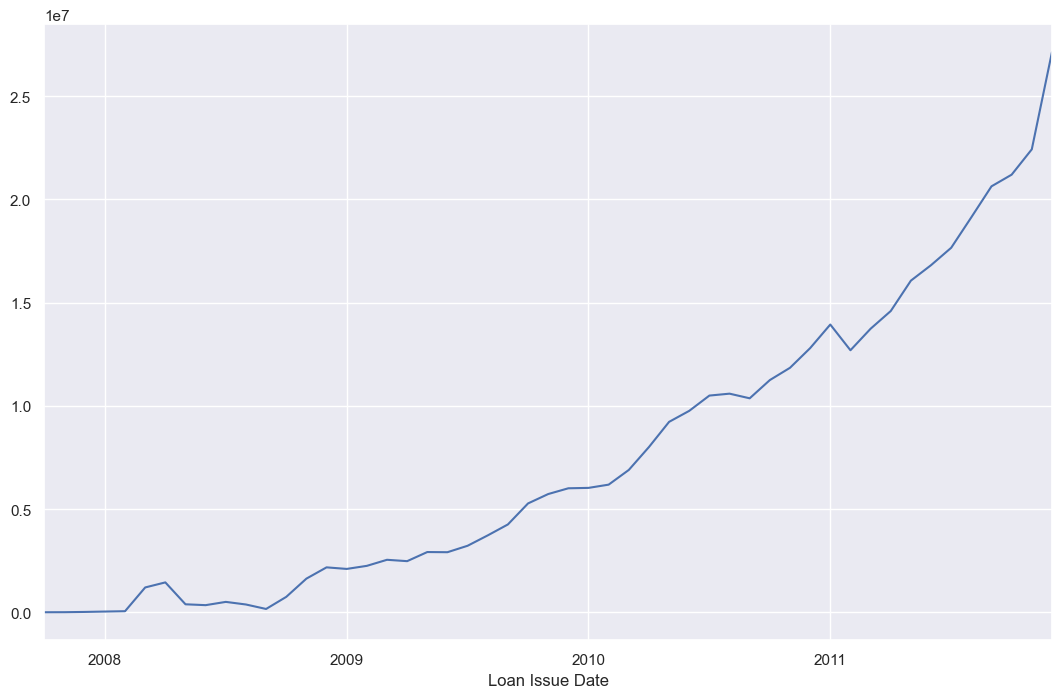

In [43]:
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot()
grouped_agg_ts.plot(ax=ax)
plt.xlabel("Loan Issue Date")

In [44]:
loan_data["issue_month"] = loan_data["issue_d"].apply(lambda x: x.split("-")[0])
loan_data["issue_year"] = loan_data["issue_d"].apply(lambda x: x.split("-")[1])

<Axes: xlabel='issue_month', ylabel='count'>

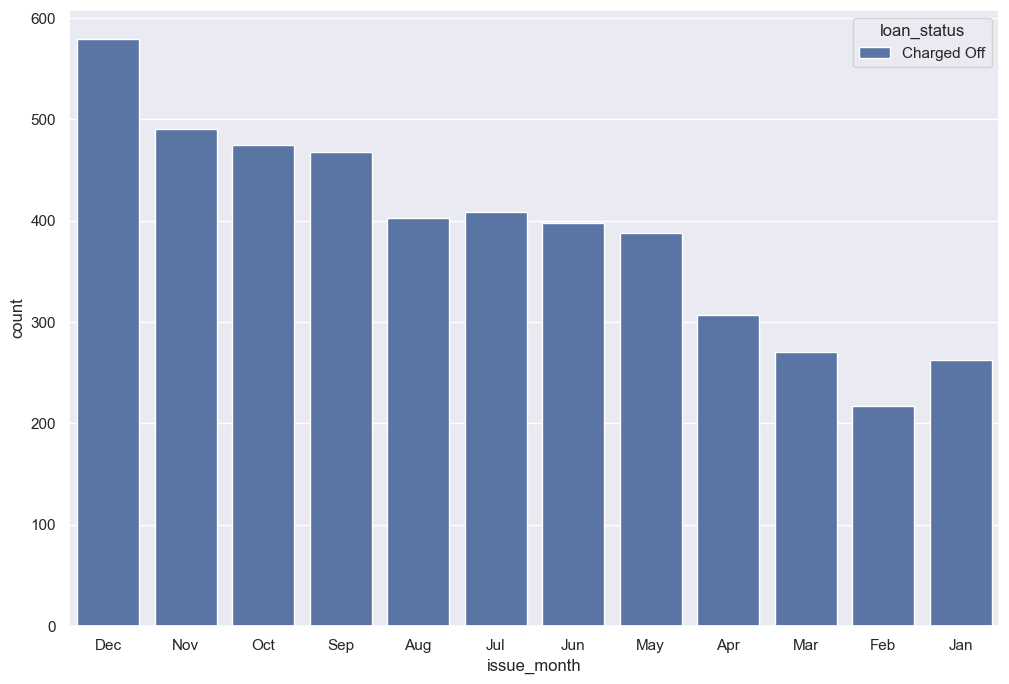

In [45]:
sns.countplot(loan_data[loan_data.loan_status == "Charged Off"], x="issue_month", hue="loan_status")

Employees who are approved with loan in December are defaulted th most

<Axes: xlabel='issue_year', ylabel='count'>

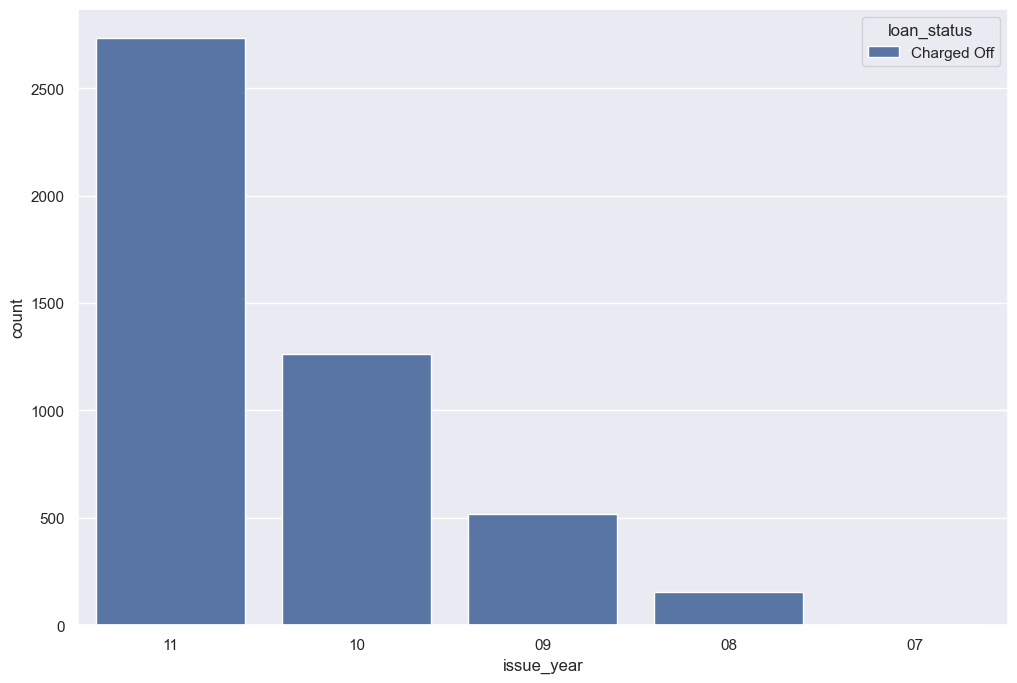

In [46]:
sns.countplot(loan_data[loan_data.loan_status == "Charged Off"], x="issue_year", hue="loan_status")

As analysed, number of loan taken incresed over years, as its increases, the number of defaults also increases

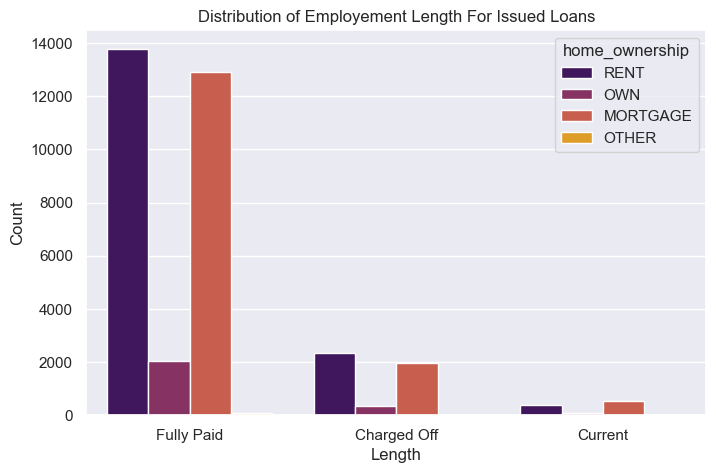

In [48]:
# Employee who resides in rented house tend to charged off then in other home ownerships like own, mortgage 
# and other categories

sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x=loan_data['loan_status'],palette='inferno', hue=loan_data["home_ownership"])
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

Employee who resides in rented house tend to charged off then in other home ownerships like own, mortgage and  other categories

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

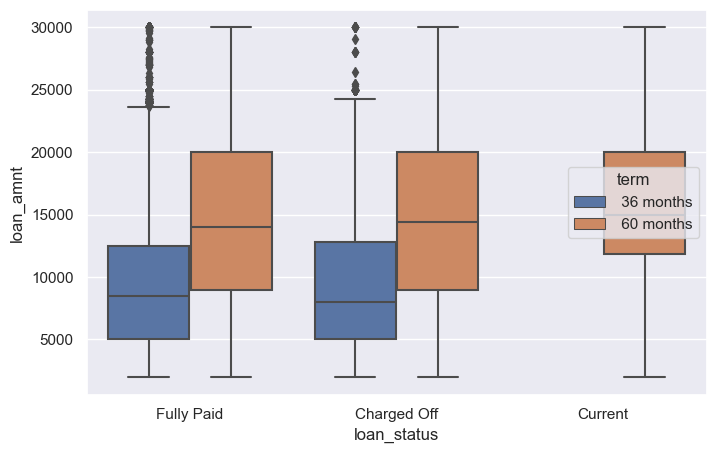

In [49]:
sns.boxplot(x=loan_data["loan_status"], y=loan_data["loan_amnt"], hue=loan_data["term"])

<Axes: xlabel='term', ylabel='count'>

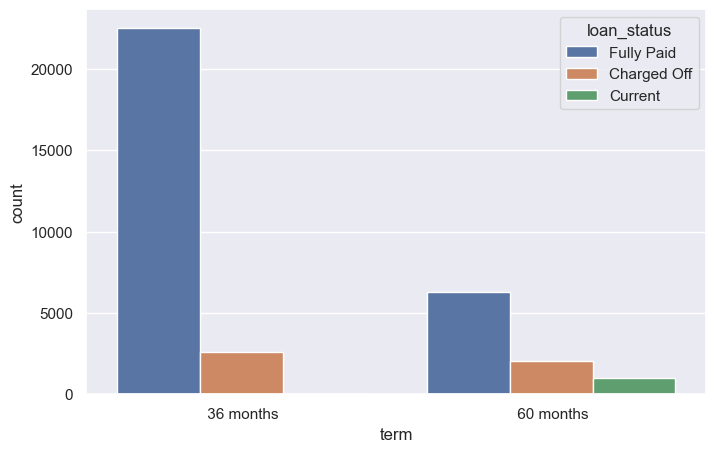

In [50]:
sns.countplot(x=loan_data["term"], hue=loan_data["loan_status"])

Term does not have any impact on the loan status, as both of them have almost equal numbers

In [51]:
fig = px.box(loan_data, x="term", y="annual_inc", color="loan_status")
fig.show()

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

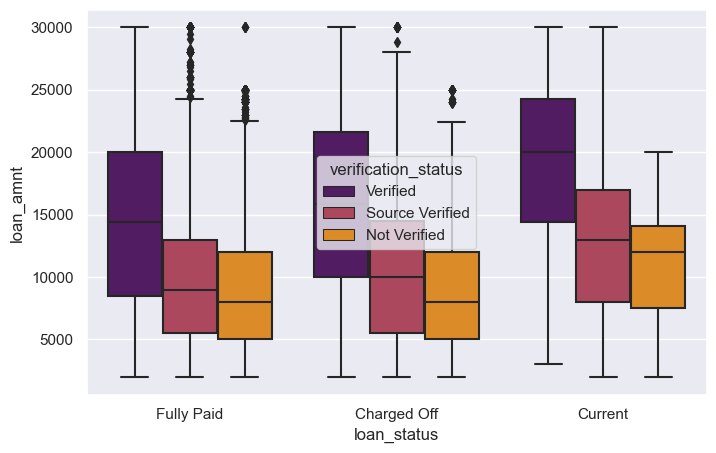

In [52]:
# Verification Status does not have a heavier impact on the loan status as the distribution looks similar in each status

sns.boxplot(x="loan_status",y="loan_amnt",data=loan_data, hue="verification_status",palette='inferno')

<Axes: xlabel='open_acc', ylabel='count'>

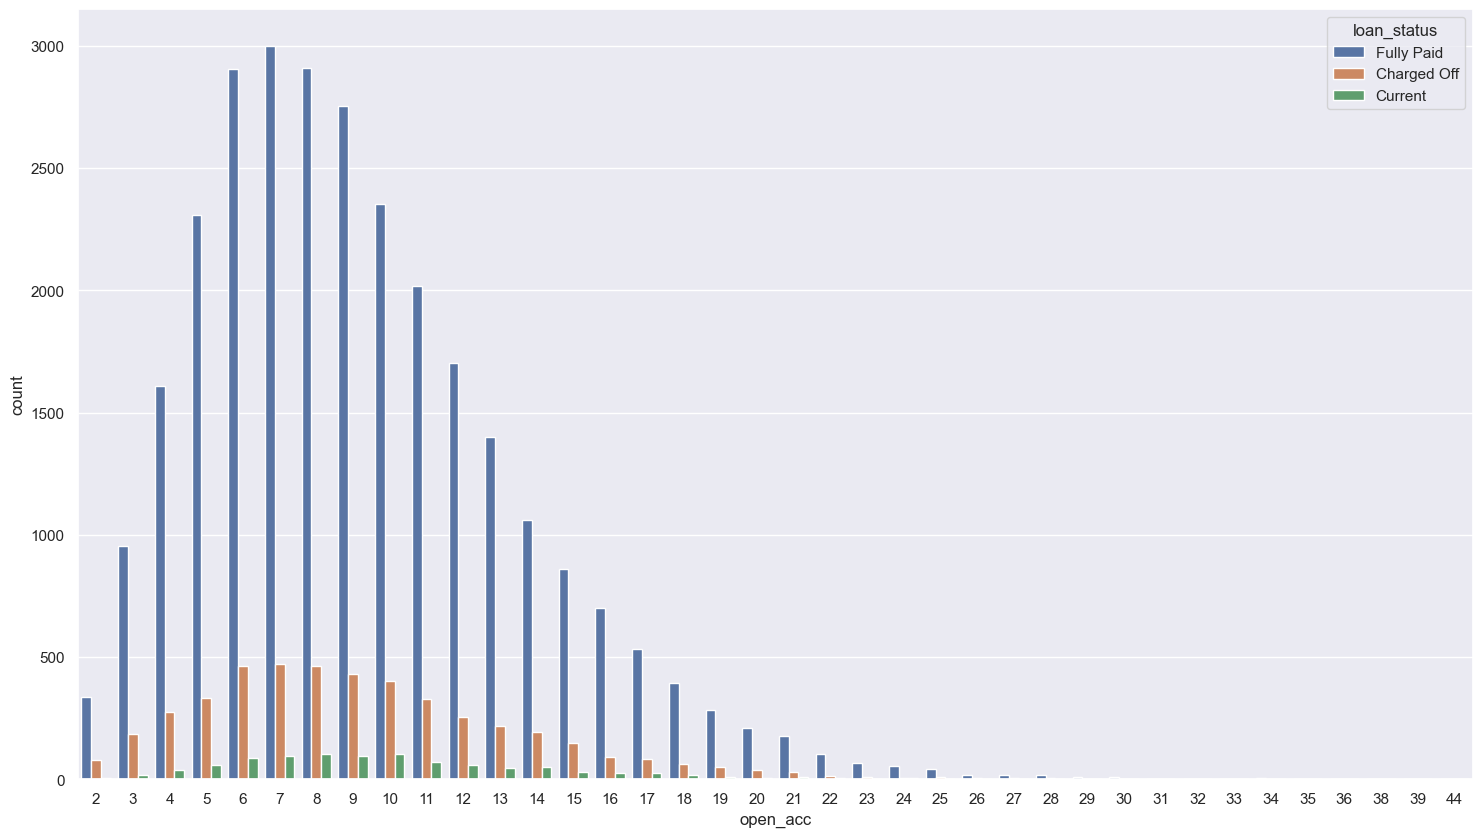

In [53]:
fig = plt.figure(figsize=(18,10))
sns.countplot(x=loan_data["open_acc"], hue=loan_data["loan_status"])

Employess with the open accounts between 6 and 9, tend to be defaulted most of the time

In [54]:
# It can be infered that, charged off employees in all the grades has a median salary less then the Fully paid employees

fig = px.box(loan_data, x="grade", y="annual_inc", color="loan_status")
fig.show()

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

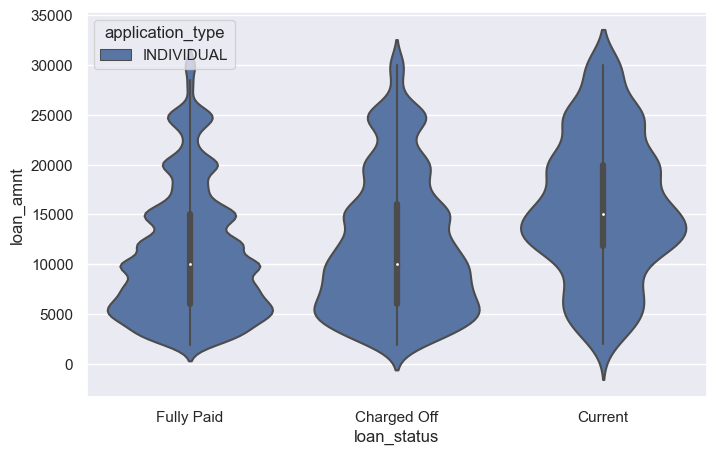

In [55]:
# Application type does not have any impact on the loan status, as all the employees who holds the account here are
# individual accounts

sns.violinplot(x=loan_data["loan_status"], y=loan_data["loan_amnt"], hue=loan_data["application_type"])

Application type does not have any impact on the loan status, as all the employees who holds the account here are individual accounts

<Axes: xlabel='int_rate', ylabel='Density'>

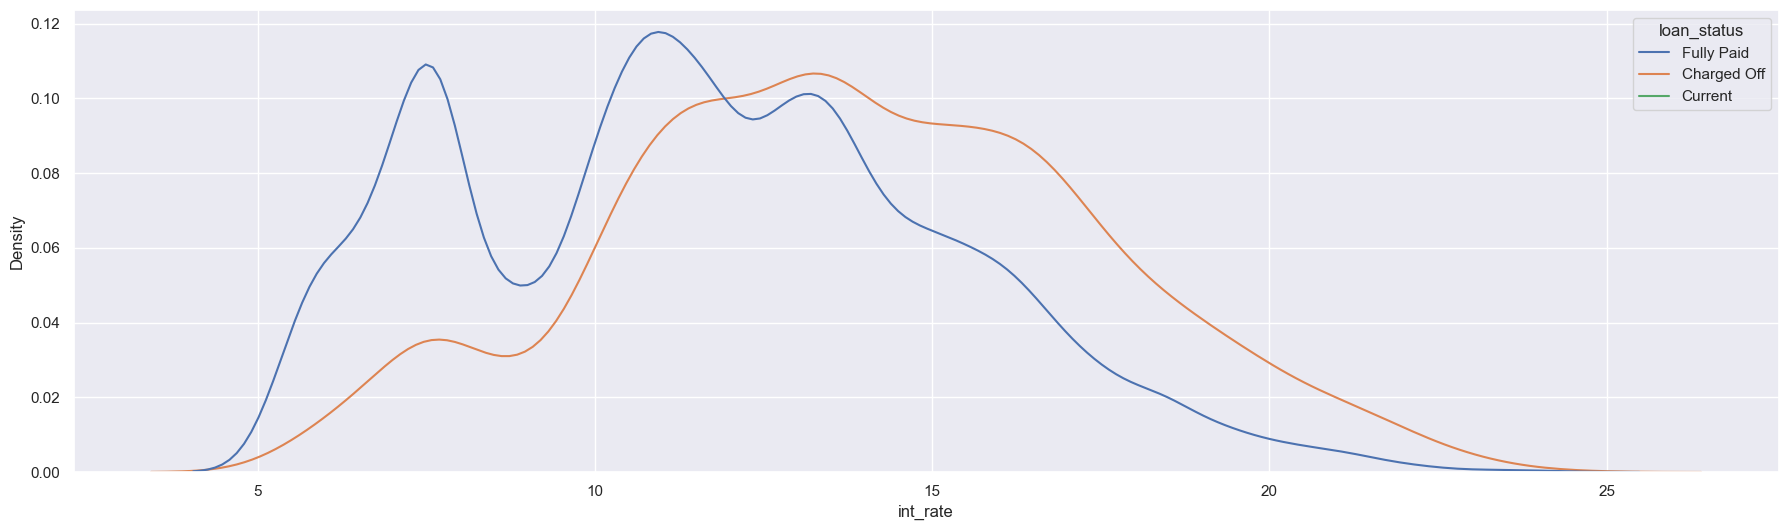

In [57]:

fig = plt.figure(figsize=(22,6))
sns.kdeplot(data=loan_data.loc[loan_data['loan_status'] == "Charged Off"], x="int_rate", label='Charged Off', legend=True, 
           hue=loan_data["loan_status"])
sns.kdeplot(data=loan_data.loc[loan_data['loan_status'] == "Fully Paid"], x="int_rate", label='Fully Paid', legend=True,
           hue=loan_data["loan_status"])


It can be inferred that if the interest rate exceeds beyond the particular value, charged off person increases than the full paid ones

<Axes: xlabel='loan_amnt', ylabel='Density'>

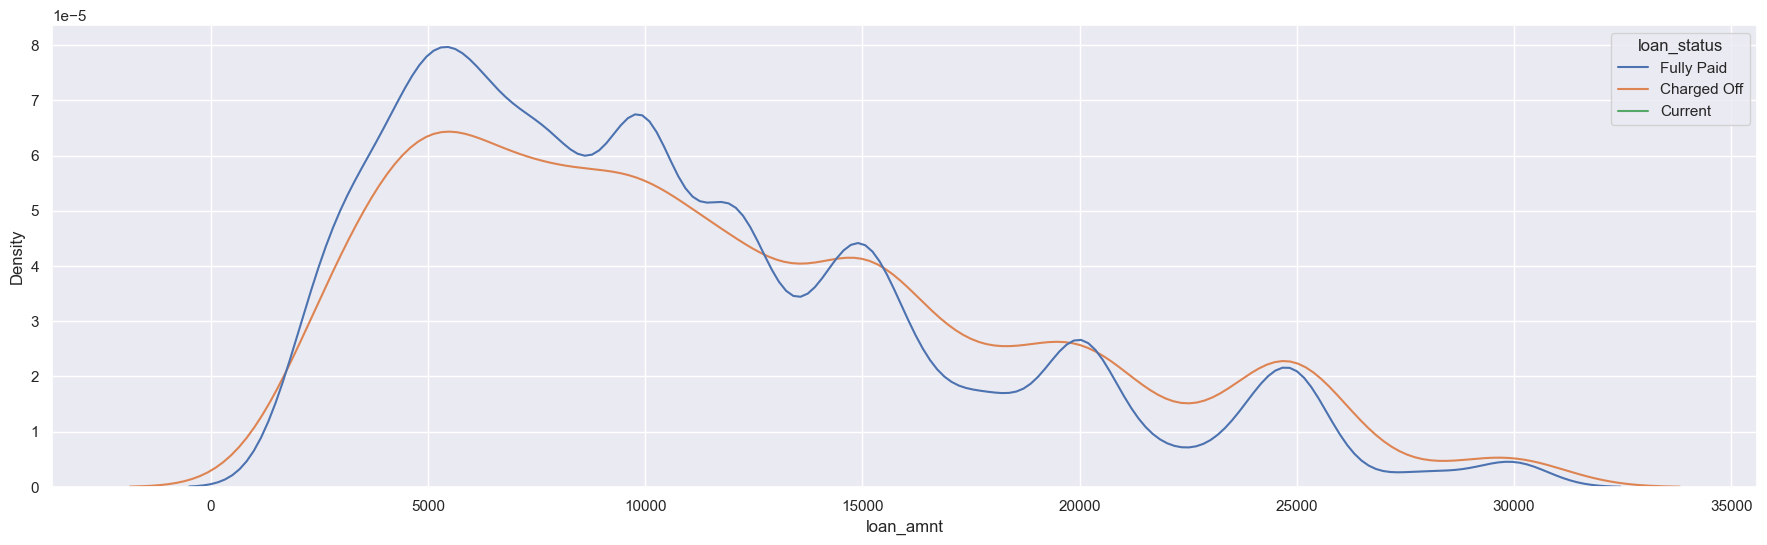

In [58]:
fig = plt.figure(figsize=(22,6))

sns.kdeplot(loan_data.loc[loan_data['loan_status'] == "Charged Off"], x="loan_amnt", label='Charged Off', legend=True,
           hue=loan_data["loan_status"])
sns.kdeplot(loan_data.loc[loan_data['loan_status'] == "Fully Paid"], x="loan_amnt", label='Fully Paid', legend=True,
           hue=loan_data["loan_status"])

The same trend has been seen with respect to loan amount, when the amount is less, both categories Fully paid and 
charged off follows the same trend, but when the amount increases, the count charged off slightly overtakes full paid
ones

<Axes: xlabel='revol_util', ylabel='Density'>

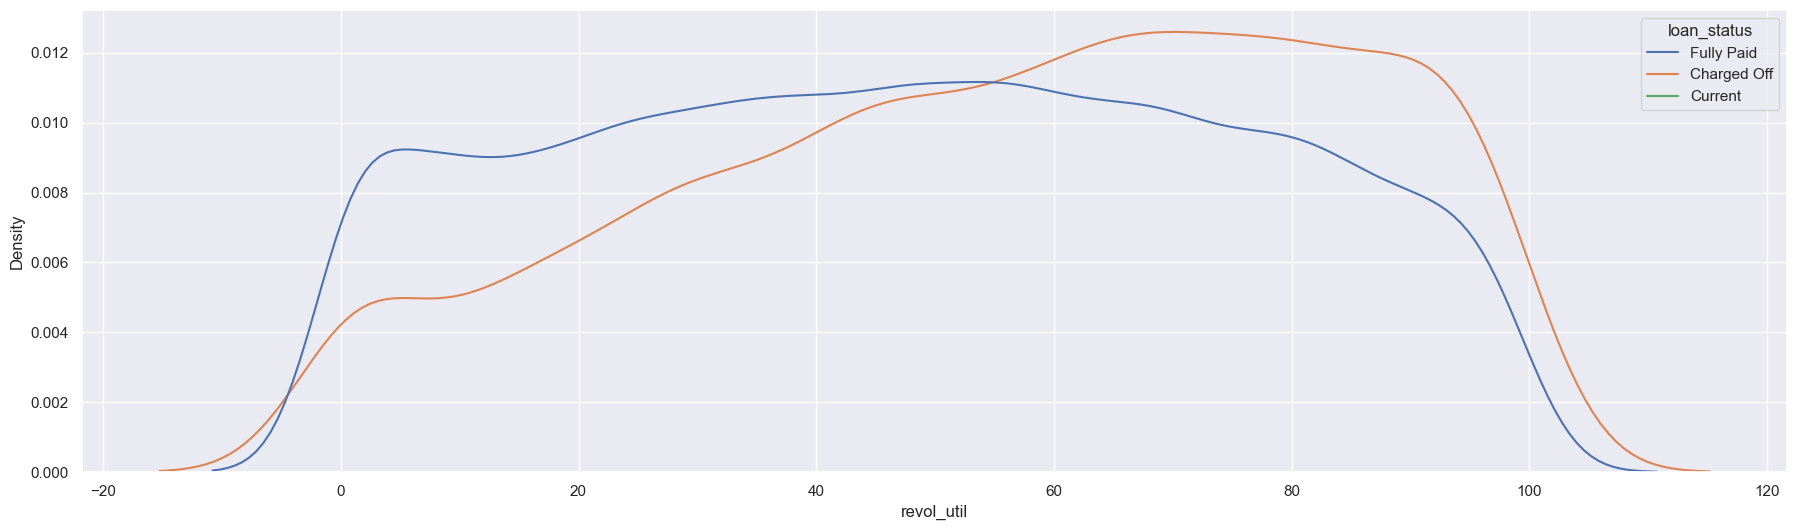

In [59]:
fig = plt.figure(figsize=(22,6))

sns.kdeplot(loan_data.loc[loan_data['loan_status'] == "Charged Off"], x="revol_util", label='Charged Off', legend=True,
           hue=loan_data["loan_status"])
sns.kdeplot(loan_data.loc[loan_data['loan_status'] == "Fully Paid"], x="revol_util", label='Fully Paid', legend=True,
           hue=loan_data["loan_status"])

The same trend has been seen with respect to revolving utilisation, increase in utilisation increases the changes of being defaulted

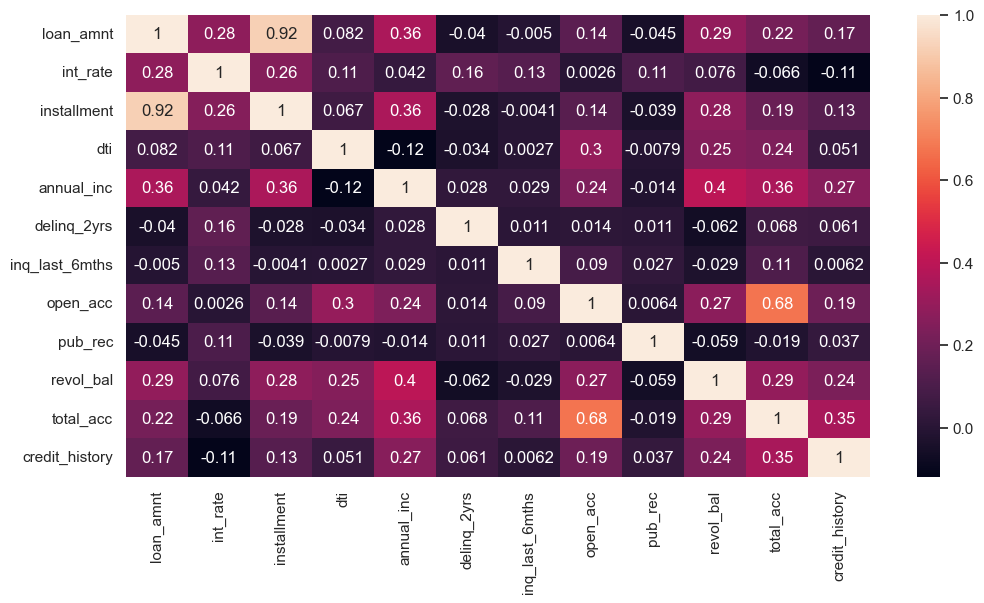

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(loan_data[['loan_amnt', 'int_rate', 'installment', 'dti', 'annual_inc', 'delinq_2yrs', 
                       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 
                       'credit_history']].corr(),annot=True)
plt.show()

In [63]:
def loan_plot(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    # print(grp)
    # print(cnt)
    percentages = grp.unstack() * 100 / cnt.T
    # print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('pastel'))
    ax.set_ylabel('percent of loans' + loanstatus)
    plt.tight_layout()
    return ax

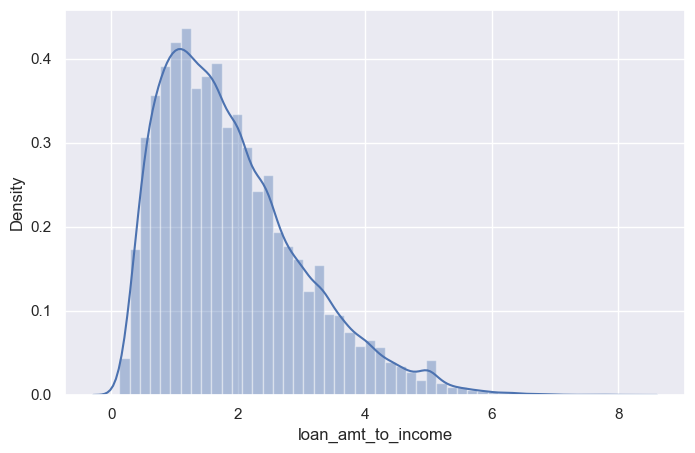

In [64]:
loan_data['loan_amt_to_income'] = loan_data['loan_amnt'] / loan_data['annual_inc'] * 10
sns.distplot(loan_data['loan_amt_to_income'])

loan_data['loan_amt_to_income'] = (loan_data['loan_amt_to_income'].astype(int))

<Axes: xlabel='loan_amt_to_income', ylabel='percent of loansCharged Off'>

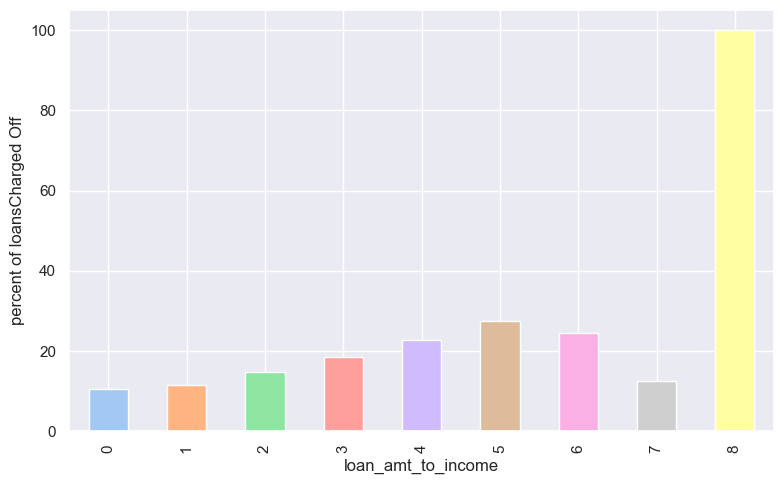

In [65]:
loan_plot(loan_data, "loan_amt_to_income")

Contributing more proportion of income to loan, significantly affects employees to be charged off

<Axes: xlabel='grade', ylabel='count'>

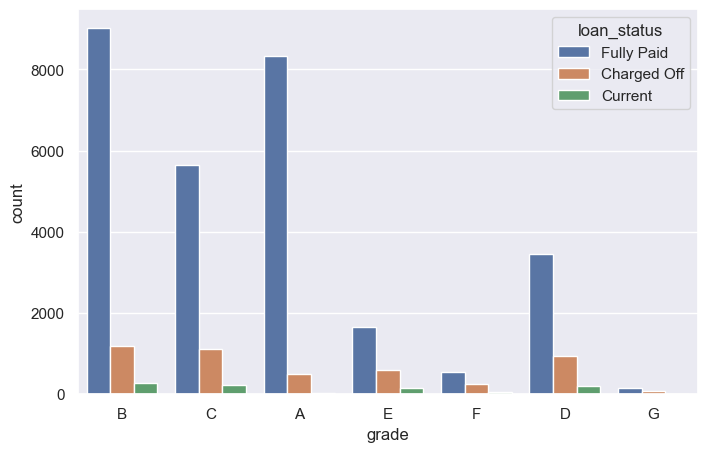

In [66]:
sns.countplot(x=loan_data["grade"], hue=loan_data["loan_status"])

Employees with Grade B and C, defaults the most when compared to all other grades

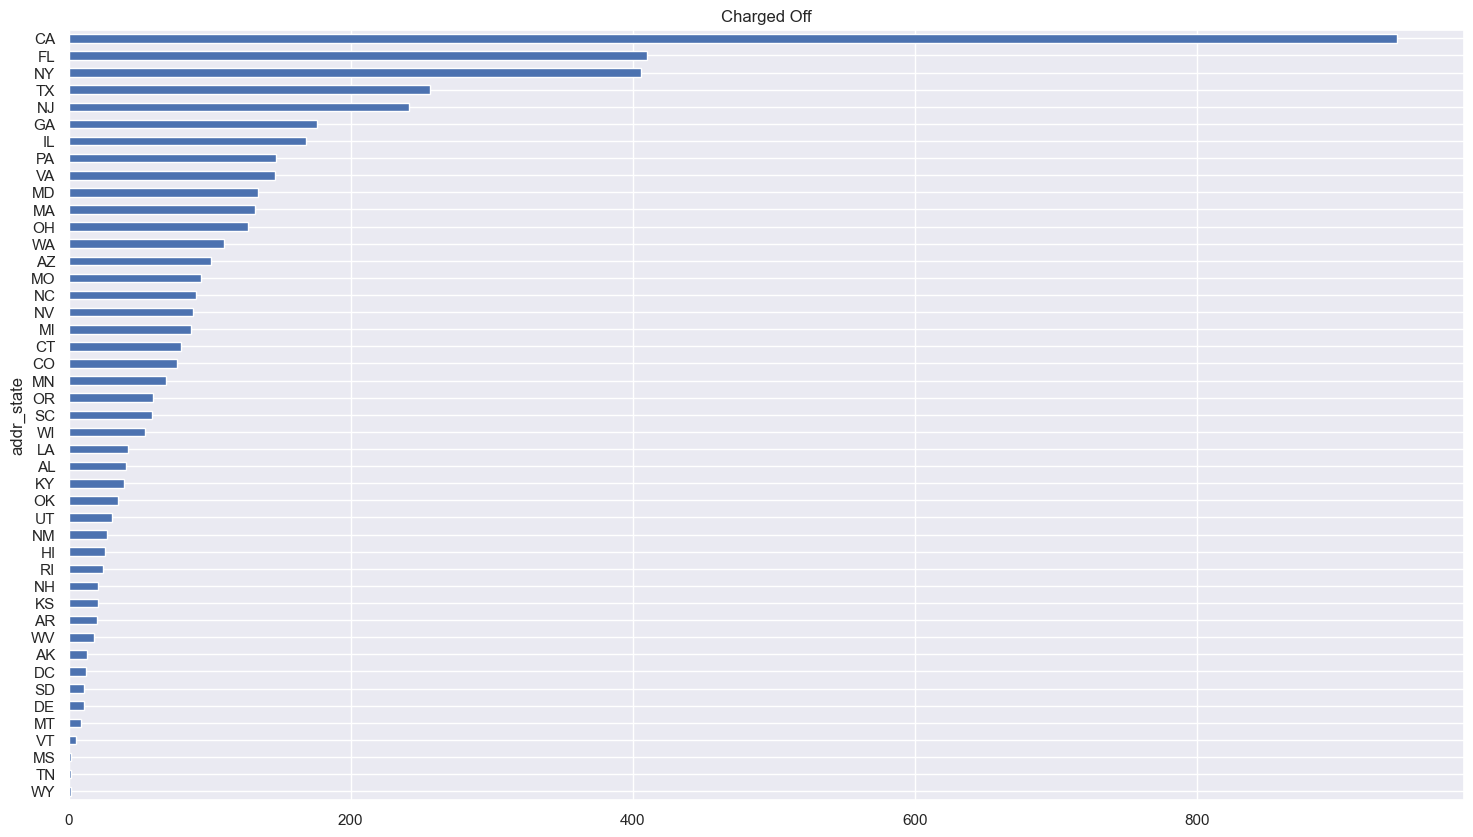

In [67]:


fig = plt.figure(figsize=(18,10))
loan_data[loan_data['loan_status']=="Charged Off"].groupby('addr_state')['loan_status'].count().sort_values().plot(kind='barh')
plt.title('Charged Off');

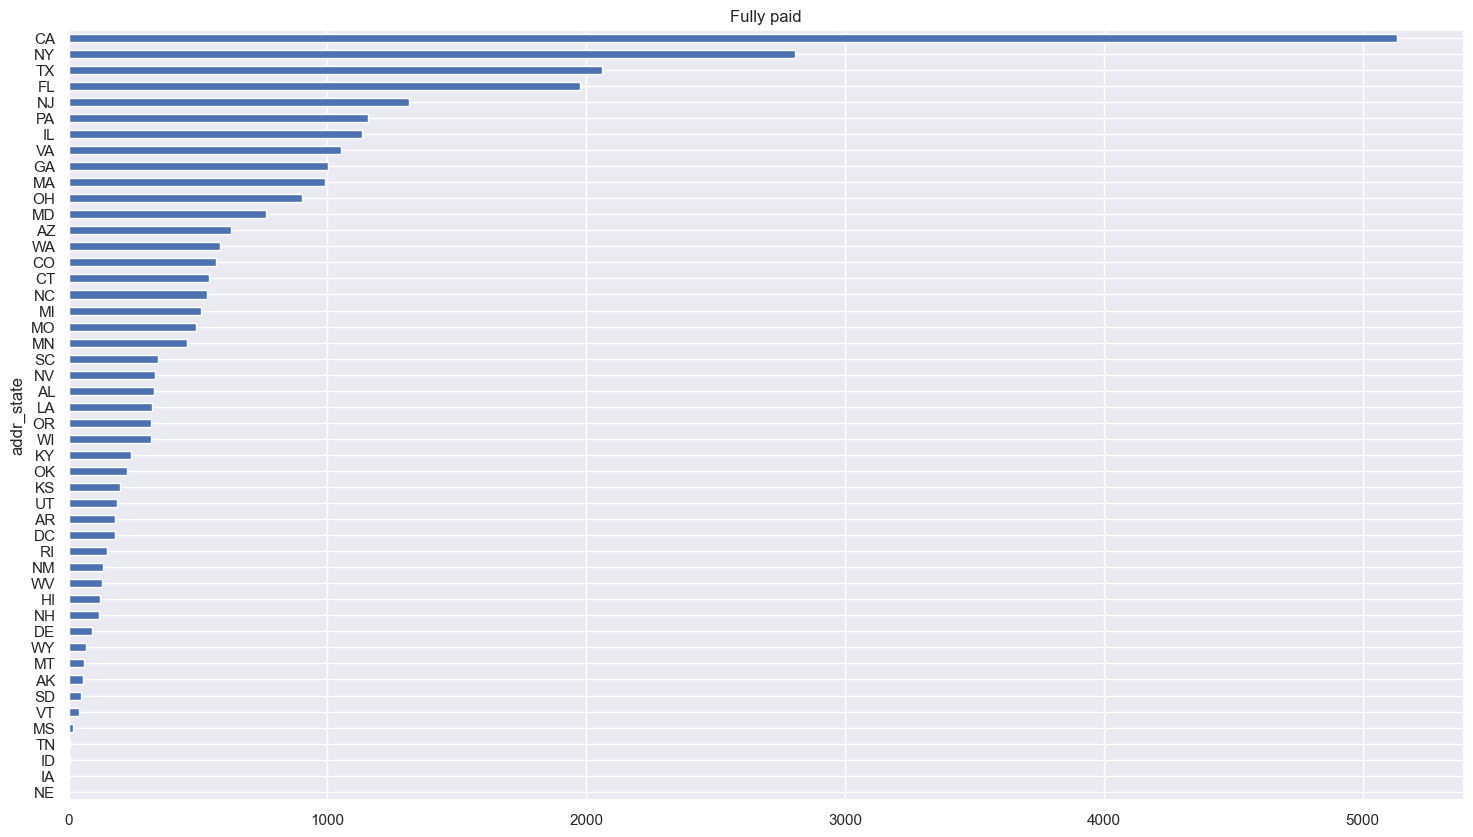

In [68]:
fig = plt.figure(figsize=(18,10))
loan_data[loan_data['loan_status']=="Fully Paid"].groupby('addr_state')['loan_status'].count().sort_values().plot(kind='barh')

plt.title('Fully paid');

<Axes: xlabel='loan_status', ylabel='int_rate'>

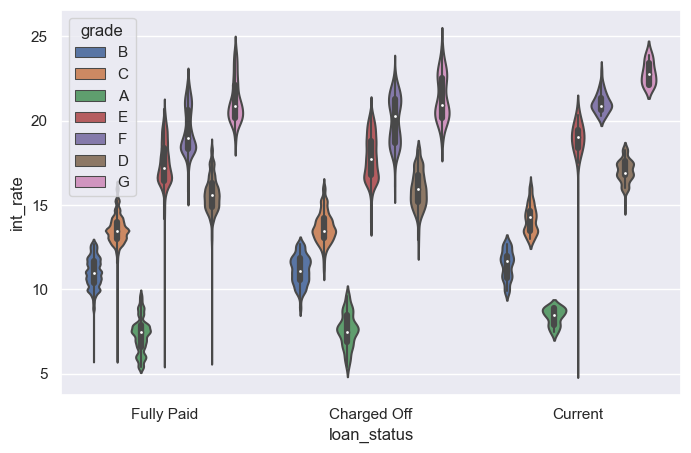

In [69]:
sns.violinplot(x="loan_status",y="int_rate",data=loan_data, hue="grade")

Interest rate with respect to grade, does not affect heavily on loan status, as the distribution remains the same across all the categories

In [70]:
loan_data["purpose"].value_counts()

purpose
debt_consolidation    16647
credit_card            4581
other                  3178
home_improvement       2498
major_purchase         1846
small_business         1524
car                    1361
wedding                 858
medical                 575
moving                  463
house                   325
vacation                289
educational             227
renewable_energy         79
Name: count, dtype: int64

In [71]:
purpose = pd.DataFrame(loan_data.groupby(by=["purpose"])["loan_status"].value_counts())

In [72]:
purpose["frequency"] = purpose["count"]/ loan_data.shape[0]

In [73]:
pur_charged_off = purpose[purpose.index.get_level_values(1) == "Charged Off"].sort_values(by=["frequency"], ascending=False)
pur_paid = purpose[purpose.index.get_level_values(1) == "Fully Paid"].sort_values(by=["frequency"], ascending=False)

In [74]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Bar(x=pur_charged_off.index.get_level_values(0), y=pur_charged_off["frequency"], name="Charged Off"))
fig.add_trace(go.Bar(x=pur_paid.index.get_level_values(0), y=pur_paid["frequency"], name="Fully Paid"))



<Axes: xlabel='verification_status', ylabel='loan_amnt'>

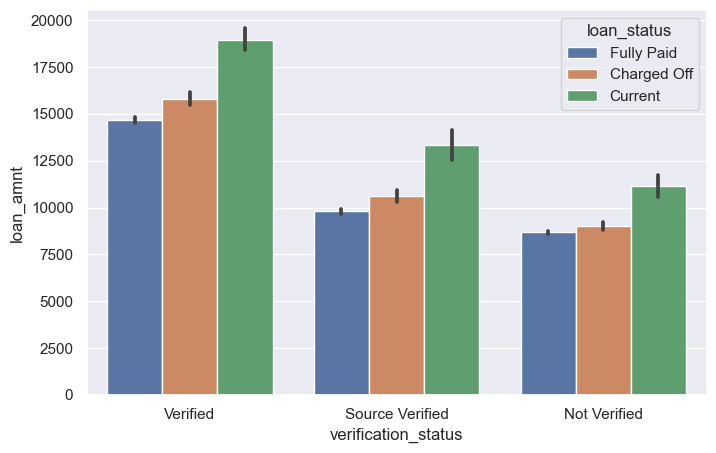

In [75]:
sns.barplot(x=loan_data["verification_status"], y=loan_data["loan_amnt"], hue=loan_data["loan_status"])

Most of the defaulters comes under verified employees

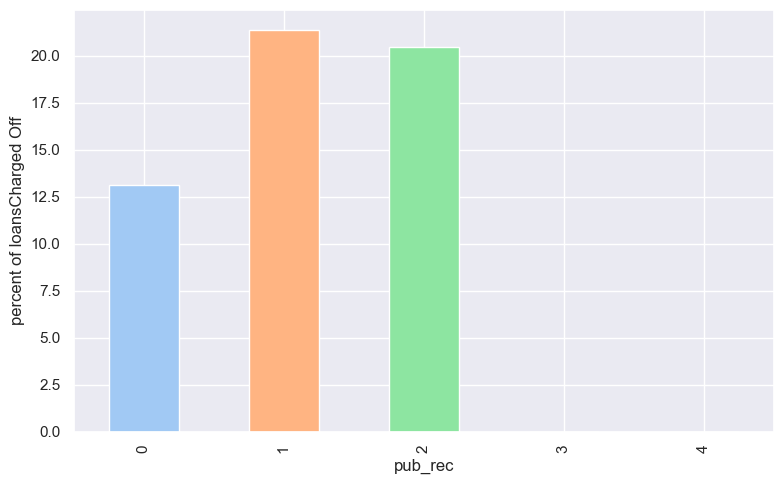

In [76]:
loan_plot(loan_data, 'pub_rec')
plt.show()

Employees with more derogatories are significantly affected, and are defaulted

<Axes: xlabel='pub_rec_bankruptcies', ylabel='percent of loansCharged Off'>

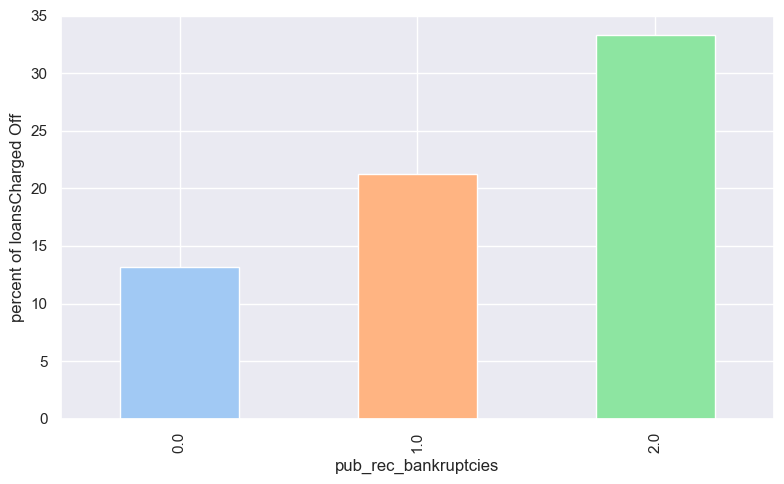

In [77]:
loan_plot(loan_data, "pub_rec_bankruptcies")

Employees with more bankruptcies are significantly affected, and are defaulted